# **Project 1 - Wine Dataset**

## **TASK 1**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the dataset

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/wine-clustering.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#Exploratory data analysis for assigned dataset.

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.shape

(178, 13)

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

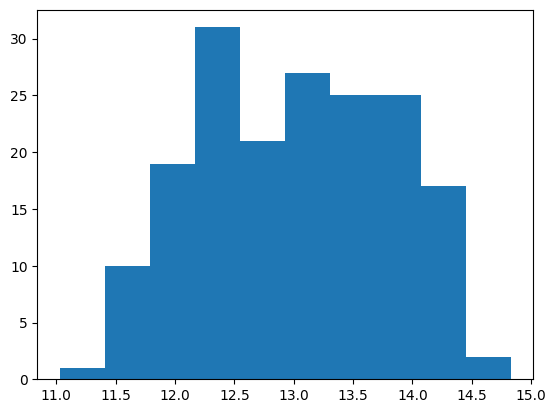

In [ ]:
plt.hist(df.Alcohol)

Tady vidíme, že největší zastoupení má víno s alkoholovou úrovní 12.

*   Víno má největší zastoupení ve dvanácté úrovni, protože to je pro víno nejvíce běžné.
*   Naopak nejmenší zastoupení ma alkoholová úroveň 11.



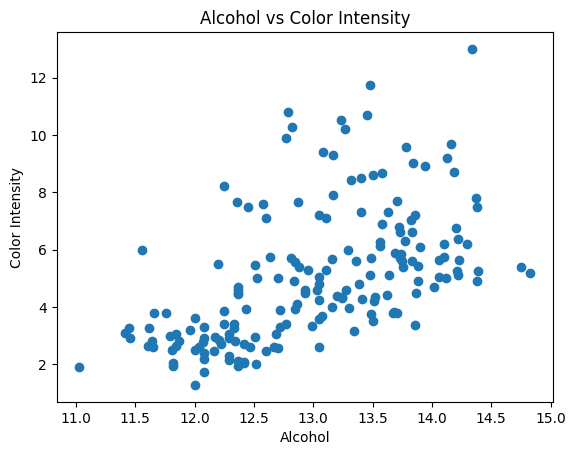

In [ ]:
plt.scatter(df['Alcohol'], df['Color_Intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Alcohol vs Color Intensity')
plt.show()


Tento graf není moc lineární a těžko se z něho dostává nějaké informace. Osoobně jsem si myslel, že lepší alkohol, bude mít sytější barvu, to se ale projevuje pouze u jednoho vína s
14.5 a u vín s 15.0 už jde sytost zase ke středu. Dále vidíme, že nejmenší úroveň má i nejvetší intenzivitu.

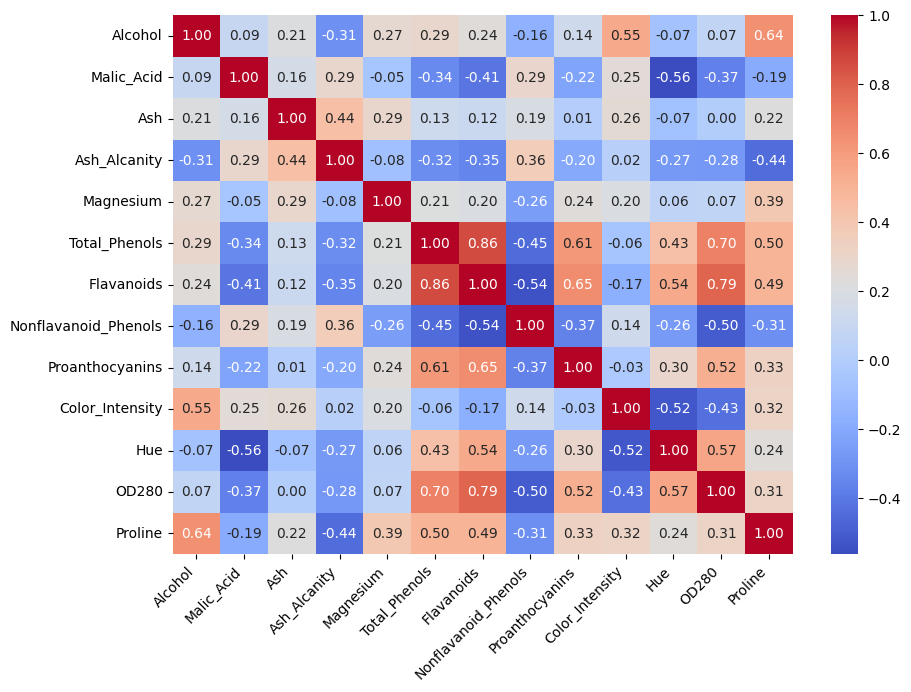

In [ ]:
plt.figure(figsize=(10, 7))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

Největší podobnost mají flavonoidy a celkové fenoly. Oba totiž slouží jako antioxidanty. Ona mají podobné chemické a biologické složení.

Nejmenší podobnost má Ash a OD280, Ash je celkový počet minerálů po spalování vína a OD280 měří organické složky. Protože oba měří úplně něco jiného, tak mají úplně jinou podobnost.

Nepřímá úměra jde nejvíce vidět u Hue(odstín) a malic_acid kyselina jablečná. To pravděpodobně znamená, že čím více jablečné kyseliny ve vínu je, tím menší bude odstín.

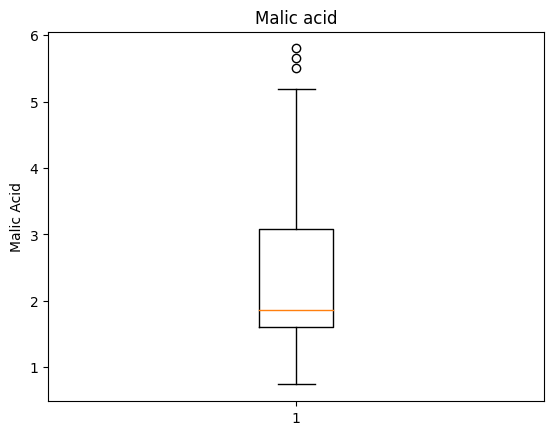

In [ ]:
plt.boxplot(df['Malic_Acid'])
plt.title('Malic acid')
plt.ylabel('Malic Acid')
plt.show()


Tady vidíme, že pruměrná úroven jablečné štávy je 2-3, uroven 5.5 a víš už je anomálie.

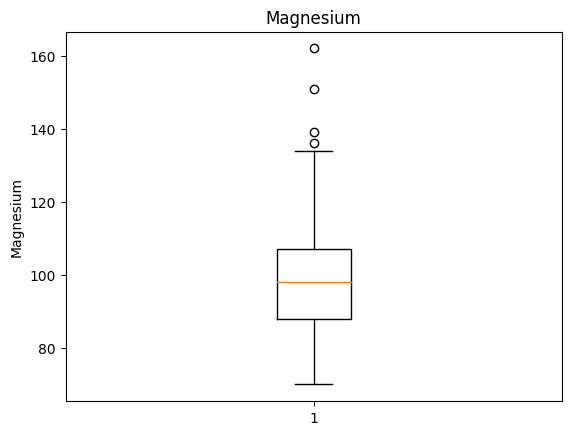

In [ ]:
plt.boxplot(df['Magnesium'])
plt.title('Magnesium')
plt.ylabel('Magnesium')
plt.show()

Tady vidíme, že průmer se pohybuje okolo 100 a od 140 už se jedná o anomálii, tak vysoký obsah magnesie je pravděpodobně díky hroznům, které obsahují velké množství magnésia.

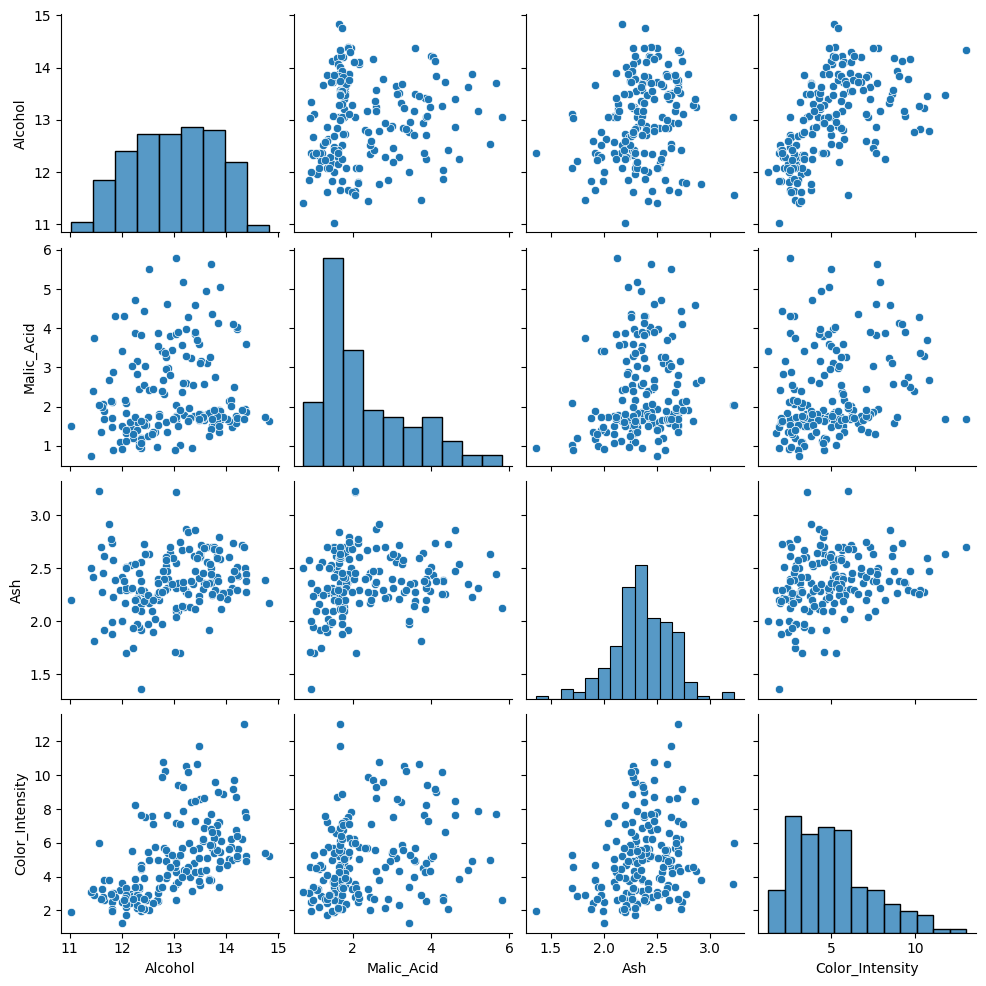

In [ ]:
sns.pairplot(df[['Alcohol', 'Malic_Acid', 'Ash', 'Color_Intensity']])
plt.show()


První se zaměříme na histogramy:

1.   Alkohol histogram - převažují vína s alkoholovým stupněm 12-13,5.
2.   Jablečná šťáva - převažují vína s menší úrovní jablečné šťávy.
3.   Popel - podobně jako u alkoholu, není zde žádné převážení, nejvíce je v prostřed.
4.   Barva - vidíme, že stejně jako u jablečné šťávy převařujou vína s menší intenzitou barvy.



Scatterplots:

Z žádné grafu nedokážeme rozpoznat přímý vztah.





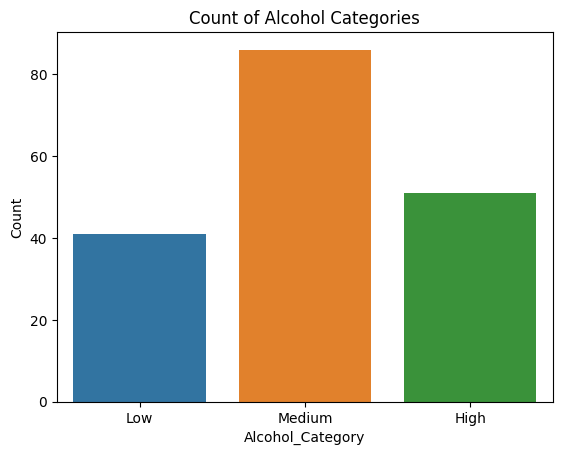

In [ ]:
df['Alcohol_Category'] = pd.cut(df['Alcohol'], bins=3, labels=['Low', 'Medium', 'High'])
sns.countplot(x='Alcohol_Category', data=df)
plt.title('Count of Alcohol Categories')
plt.ylabel('Count')
plt.show()


Tady jsem provedl rozdělení do tří kategorií pomocí pd.cut, která mi alkohol rozdělila na 3 intervaly, alkohol je v rangi 11-15. Vidíme, že nejvíce má prostřední část,
 což je něco mezi 12.3 až 13.6, což je u vín běžné.

## **TASK 2**

In [ ]:
df = df.drop(columns=['Alcohol_Category']) # muzeme takhle odebrat všechny columns


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numeric = df.select_dtypes(include=[np.number])
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [ ]:
df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


Osobně bych neodebral ani jeden sloupec, nebot jsou všechny potřebné ke znání složení. Můžeme ale vyuužít kategorizaci, protože nám nějak graf nerozbije, můžeme například rozdělit kategorie dle urovne alkoholu. Dále využijeme scaling, pro použití k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

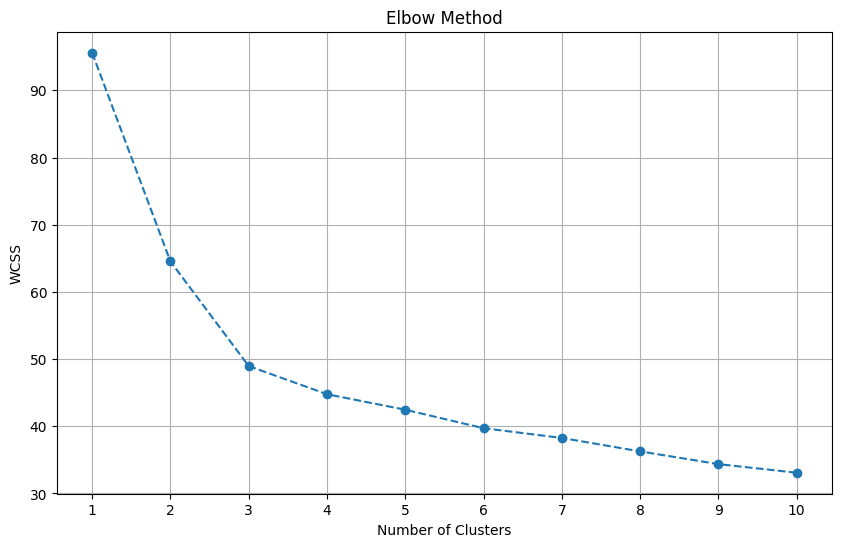

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Vytvoříme si elbow metodu.Nejprudší zhyb je v bodu 3, proto si volíme číslo 3 jako naše optimální číslo clusterů pro náš data set.

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustery si uložíme do proměnné optimal_clusters

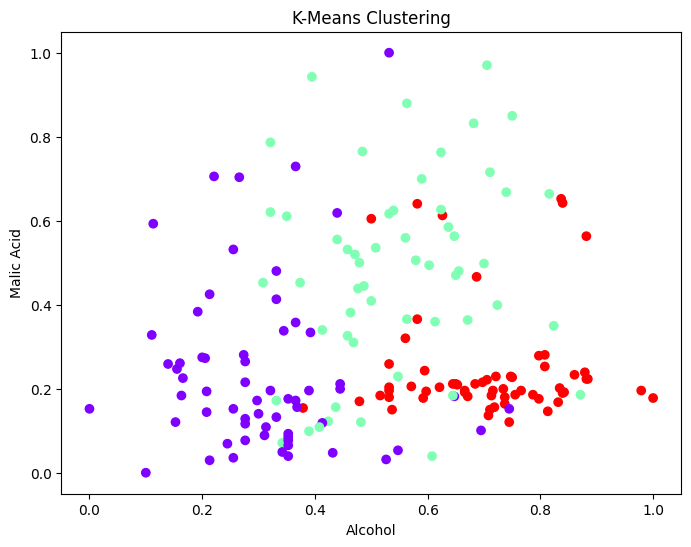

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Alcohol'], df_scaled['Malic_Acid'], c=cluster_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()



Tady se nám naše data rozdělily do tří skupin. Můžeme si všimnout, že rozdíl mezi fialovým a červeným clusterem ej dost patrný a týká se hodnoty alkholu.

In [ ]:
df['Cluster'] = cluster_labels


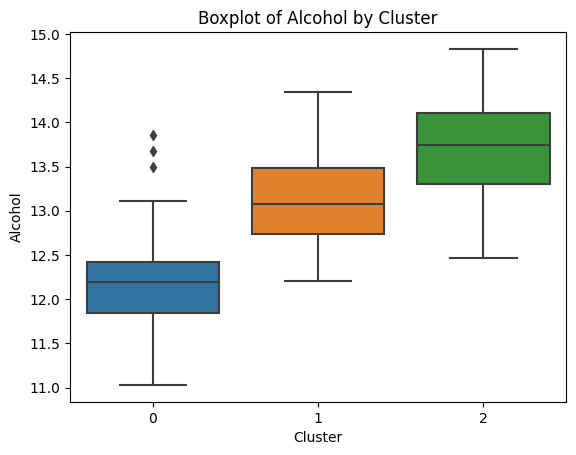

In [ ]:
sns.boxplot(x='Cluster', y='Alcohol', data=df)
plt.title('Boxplot of Alcohol by Cluster')
plt.show()


Největší průměr stupně alkoholu je ve třetím clusteru.

Anomálie se nacházejí pouze v prvním cluesteru.

---



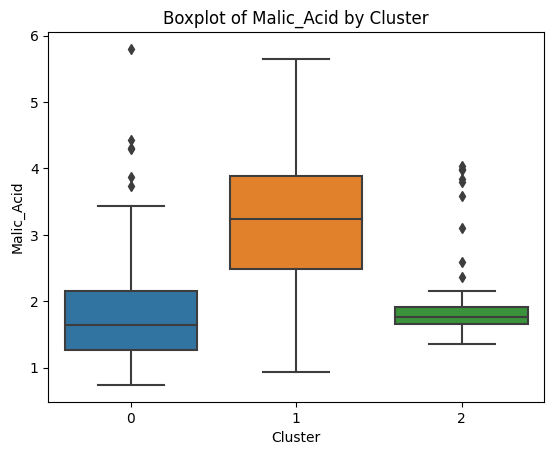

In [ ]:
sns.boxplot(x='Cluster', y='Malic_Acid', data=df)
plt.title('Boxplot of Malic_Acid by Cluster')
plt.show()

Jak již víme, tak existuje minimálně vín, s velkým stupněm kyseliny jablečné je minimálně. Tomu také odpovídá tento graf.

Největší průměr se nachází v druhém clusteru. První cluster má jednu anomálii, která se liší od ostatních se stupněm 6.

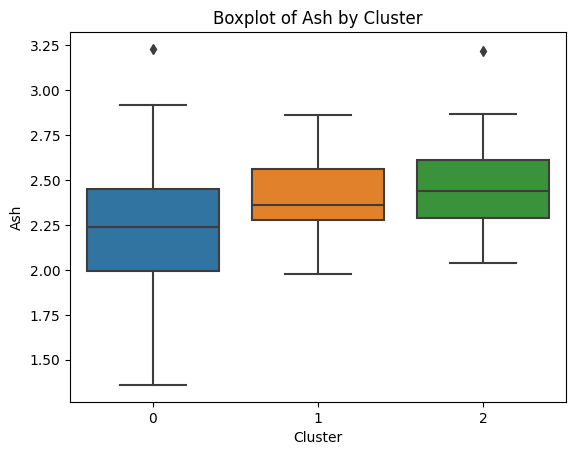

In [ ]:
sns.boxplot(x='Cluster', y='Ash', data=df)
plt.title('Boxplot of Ash by Cluster')
plt.show()

Ash průměr je u všech tří clusterů více méně stejný.

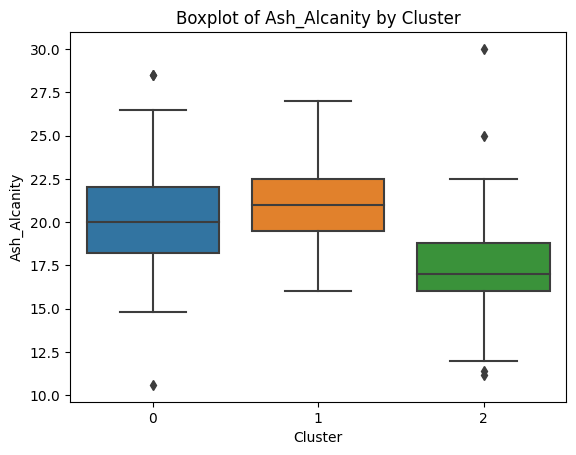

In [ ]:
sns.boxplot(x='Cluster', y='Ash_Alcanity', data=df)
plt.title('Boxplot of Ash_Alcanity by Cluster')
plt.show()

Produkty, které zůstanou po odpaření vína.

Tady si můžeme všimnou, že největší průměr je v prvním clusteru a v druhém clusteru je nejméně.

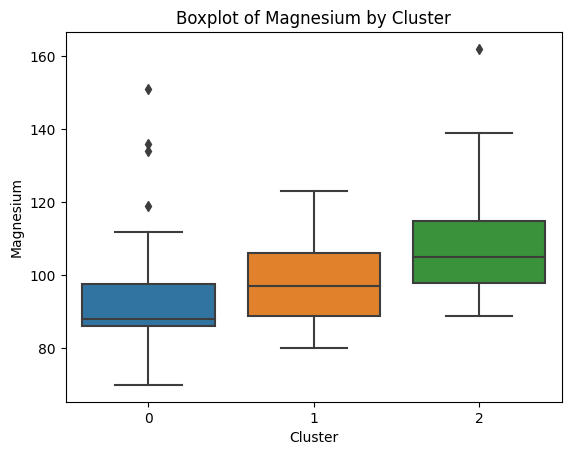

In [ ]:
sns.boxplot(x='Cluster', y='Magnesium', data=df)
plt.title('Boxplot of Magnesium by Cluster')
plt.show()

Magnésium se pohybuje okolo 100, to jsme zjistili už v prvním úkolu.

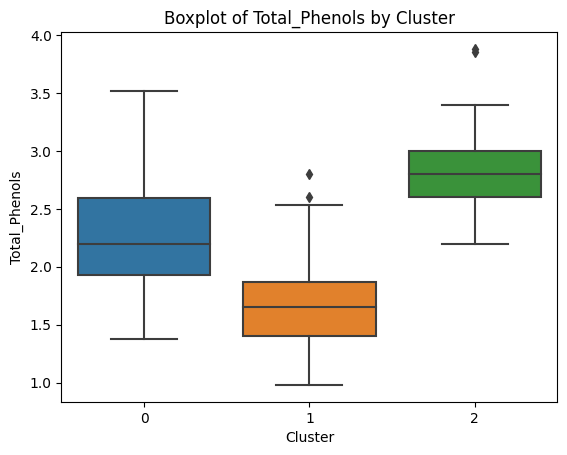

In [ ]:
sns.boxplot(x='Cluster', y='Total_Phenols', data=df)
plt.title('Boxplot of Total_Phenols by Cluster')
plt.show()

Kyselina karbonová, jedovatá krystalická látka. Tady vidíme, že druhý cluster jí má nejméně a třetí nejvíce.

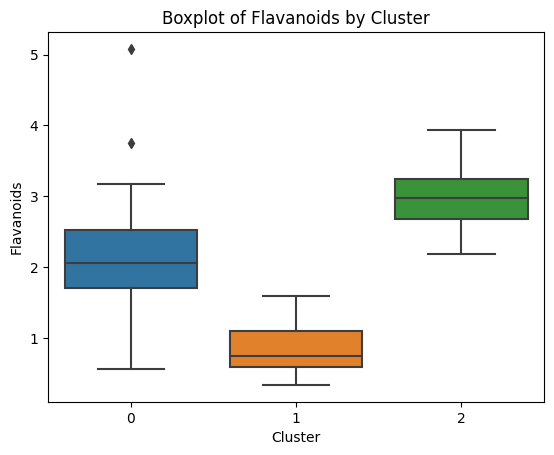

In [ ]:
sns.boxplot(x='Cluster', y='Flavanoids', data=df)
plt.title('Boxplot of Flavanoids by Cluster')
plt.show()

Flavanoidy přispívají k barvě, chuti a pocitu v puse. Ve všech clusterech technika probíhála jinak. Na starosti to může mít doba nebo druh hroznů ze které je víno vyrobeno.

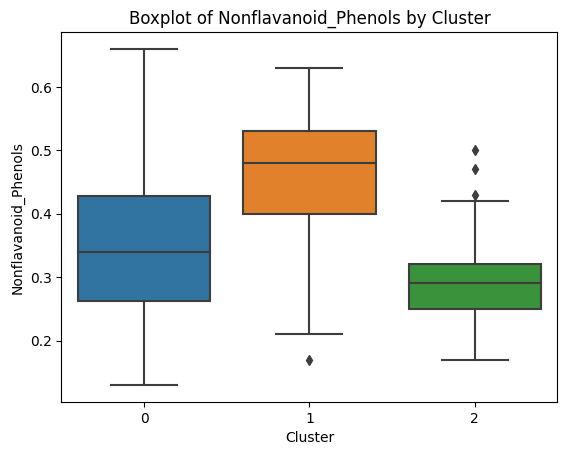

In [ ]:
sns.boxplot(x='Cluster', y='Nonflavanoid_Phenols', data=df)
plt.title('Boxplot of Nonflavanoid_Phenols by Cluster')
plt.show()

Vidíme, že nonflavanoidy mají nepřímou úměru k flavanoidům, takže druhý cluster obsahuje největší hodnotu nonflavanoidů.

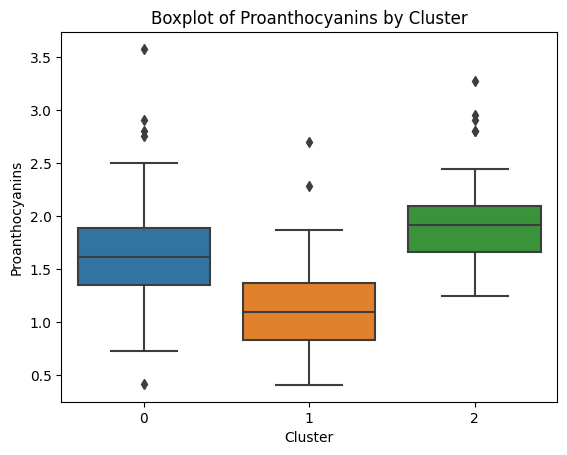

In [ ]:
sns.boxplot(x='Cluster', y='Proanthocyanins', data=df)
plt.title('Boxplot of Proanthocyanins by Cluster')
plt.show()

Opět může mít vliv zrání a typ hroznů.

V  clusteru 2 je nejmenší úroveň Proanthocyanins.

V clustetru 3 nejvěší úroveň.

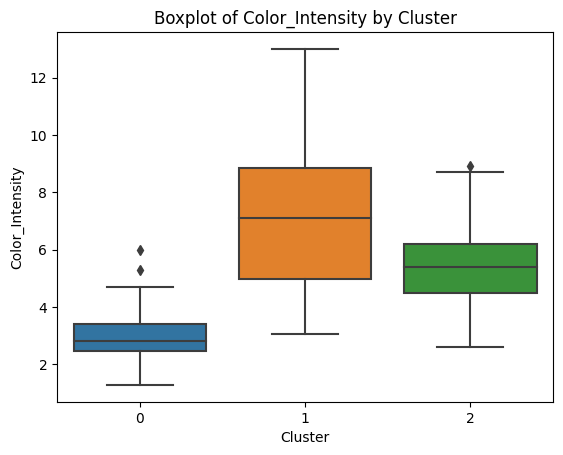

In [ ]:
sns.boxplot(x='Cluster', y='Color_Intensity', data=df)
plt.title('Boxplot of Color_Intensity by Cluster')
plt.show()

Vidíme, že rozpětí druhého clusteru je mnohem větší než u ostatních dvou, také má větší úroveň než ostatní, to indikuje, že má sytější barvu.

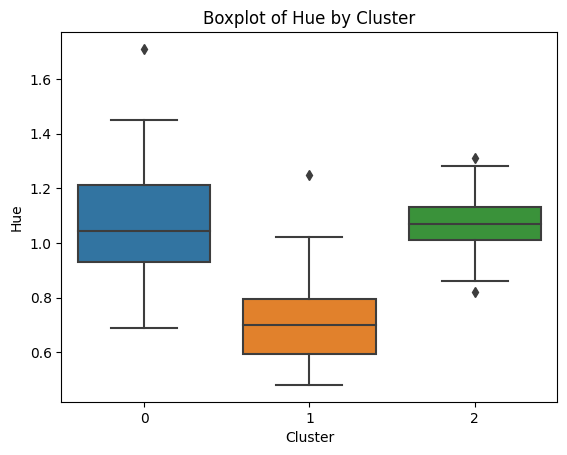

In [ ]:
sns.boxplot(x='Cluster', y='Hue', data=df)
plt.title('Boxplot of Hue by Cluster')
plt.show()

Čím větší je odstín(hue), tím červenější je barva, vidíme, že druhý cluster by se mohl skládat ze starších vín, které ztratili barvu.

Cluster 1 a 3 indikují pravděpodobně víno, které není starší.

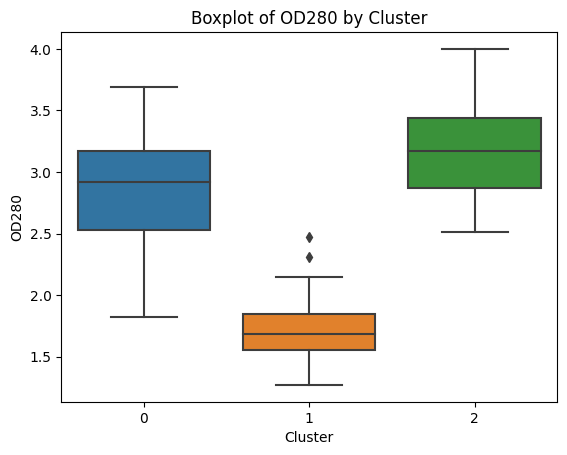

In [ ]:
sns.boxplot(x='Cluster', y='OD280', data=df)
plt.title('Boxplot of OD280 by Cluster')
plt.show()

Další látka, která se používá při analýze fenolických látek. Souvisejí s trpkostí a hořkostí vína.

Čím větší je číslo, tím větší je koncentrace fenolických látek. Je důležitá pro zrání vína, čím větší je OD280 tím lepší je pro zraní.

Z clusteru 1 vidime, že vína nejsou tak dobré pro zrání, naopak cluster 3 je nejvhodnější pro dlouhé zrání.

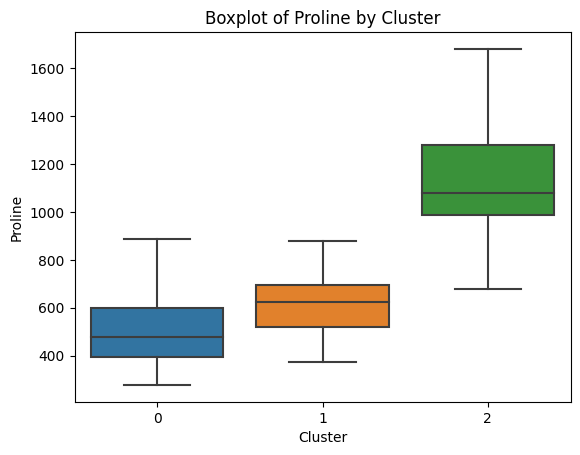

In [ ]:
sns.boxplot(x='Cluster', y='Proline', data=df)
plt.title('Boxplot of Proline by Cluster')
plt.show()

Tento cluster slouží pro zralost hroznů a kvalitu vína.

Čím větší je proline, tím větší je šance na robustní vína, tím že jsou vysvatěny více stresu než ostatní.

Největší šanci na robustní vína má cluster 3. Poté cluster 2 a naposled cluster 3. Ovšem rozdíl mezi clusterem 1 a 2 není tak velký.

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_cluster_labels = dbscan.fit_predict(df_scaled)

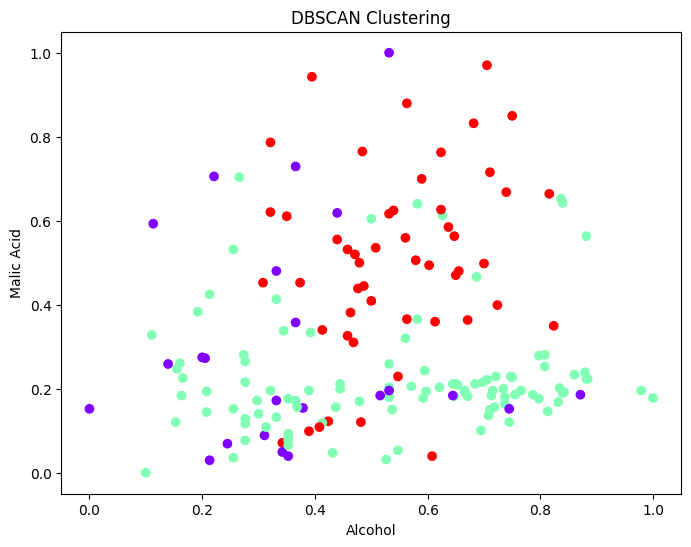

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Alcohol'], df_scaled['Malic_Acid'], c=dbscan_cluster_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()


Algoritmus dbscanu je založený na hustotě, jeho výsledek bývá počet shluků, který identifikuje odlehlé hodnoty.

In [ ]:
df['Cluster2'] = dbscan_cluster_labels

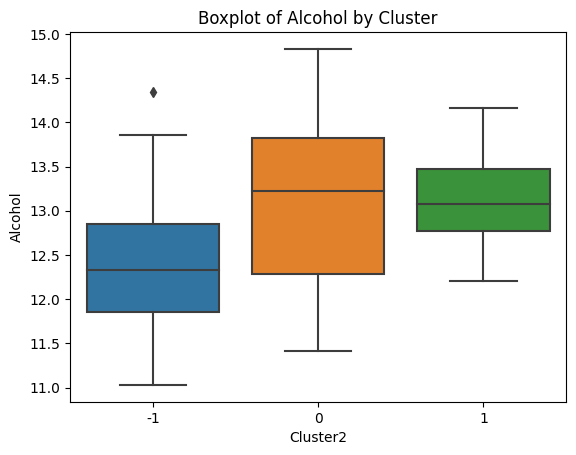

In [ ]:
sns.boxplot(x='Cluster2', y='Alcohol', data=df)
plt.title('Boxplot of Alcohol by Cluster')
plt.show()

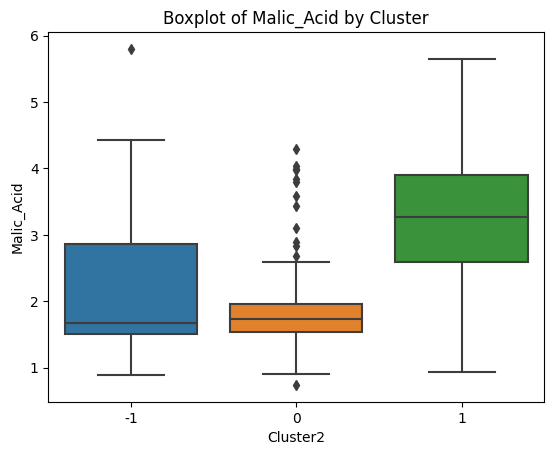

In [ ]:
sns.boxplot(x='Cluster2', y='Malic_Acid', data=df)
plt.title('Boxplot of Malic_Acid by Cluster')
plt.show()

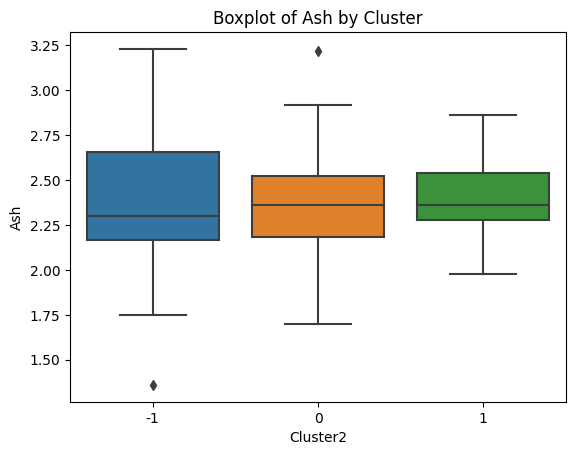

In [ ]:
sns.boxplot(x='Cluster2', y='Ash', data=df)
plt.title('Boxplot of Ash by Cluster')
plt.show()

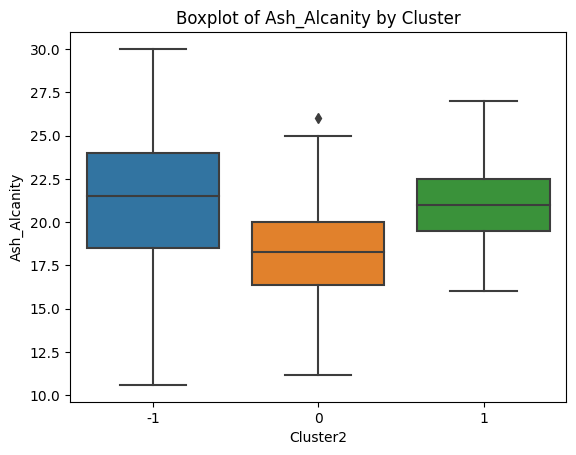

In [ ]:
sns.boxplot(x='Cluster2', y='Ash_Alcanity', data=df)
plt.title('Boxplot of Ash_Alcanity by Cluster')
plt.show()

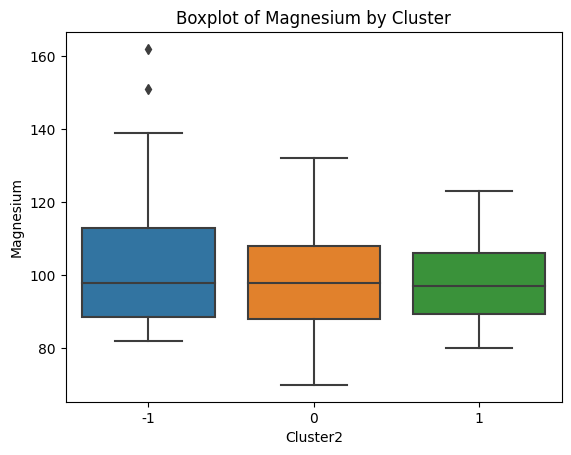

In [ ]:
sns.boxplot(x='Cluster2', y='Magnesium', data=df)
plt.title('Boxplot of Magnesium by Cluster')
plt.show()

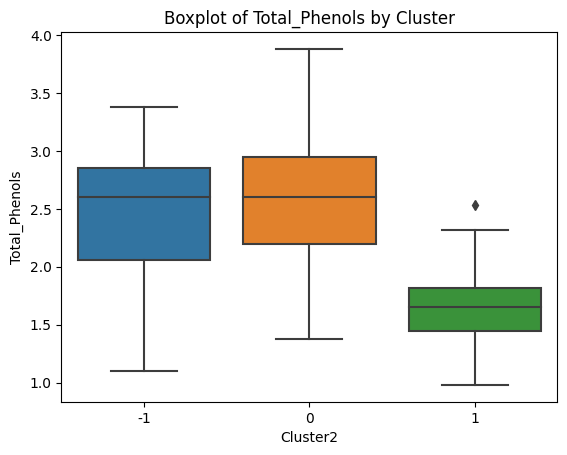

In [ ]:
sns.boxplot(x='Cluster2', y='Total_Phenols', data=df)
plt.title('Boxplot of Total_Phenols by Cluster')
plt.show()

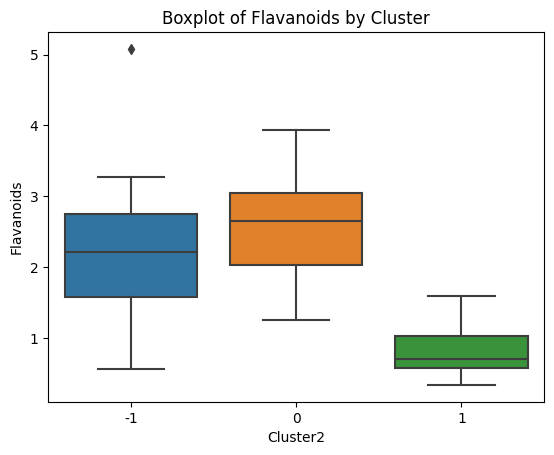

In [ ]:
sns.boxplot(x='Cluster2', y='Flavanoids', data=df)
plt.title('Boxplot of Flavanoids by Cluster')
plt.show()

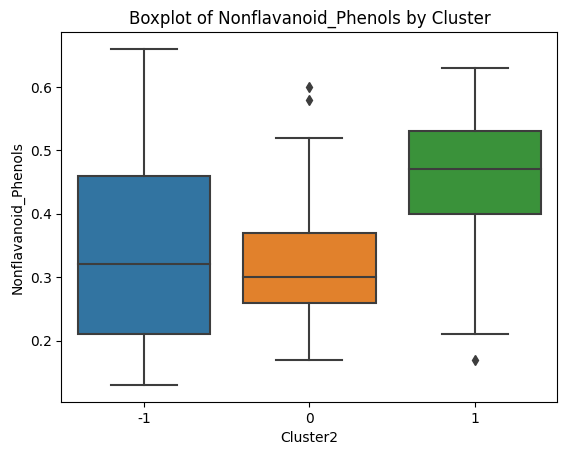

In [ ]:
sns.boxplot(x='Cluster2', y='Nonflavanoid_Phenols', data=df)
plt.title('Boxplot of Nonflavanoid_Phenols by Cluster')
plt.show()

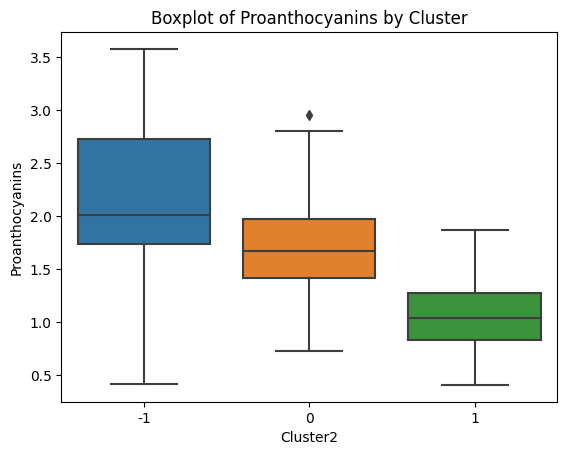

In [ ]:
sns.boxplot(x='Cluster2', y='Proanthocyanins', data=df)
plt.title('Boxplot of Proanthocyanins by Cluster')
plt.show()

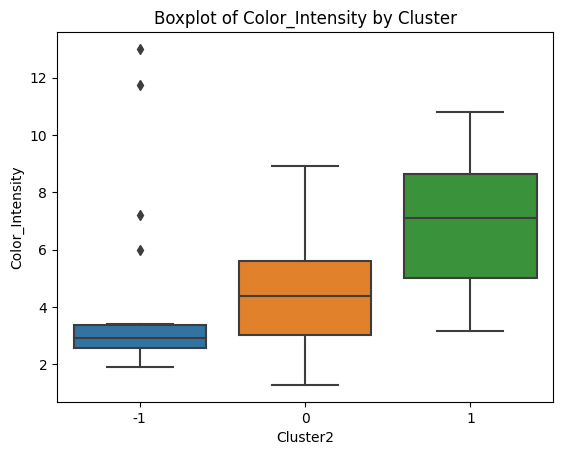

In [ ]:
sns.boxplot(x='Cluster2', y='Color_Intensity', data=df)
plt.title('Boxplot of Color_Intensity by Cluster')
plt.show()

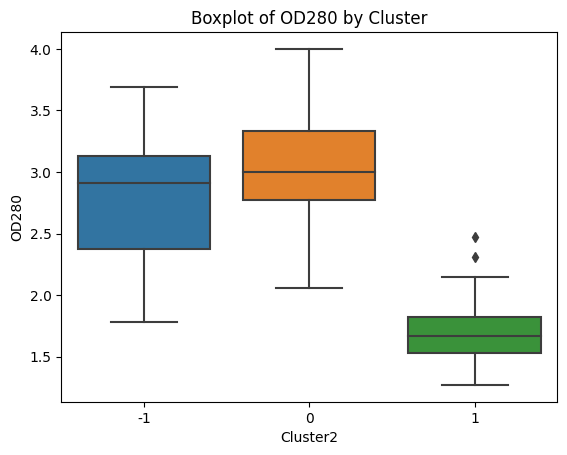

In [ ]:
sns.boxplot(x='Cluster2', y='OD280', data=df)
plt.title('Boxplot of OD280 by Cluster')
plt.show()

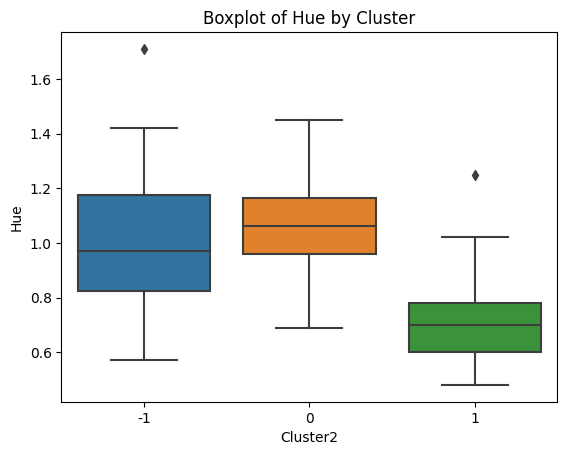

In [ ]:
sns.boxplot(x='Cluster2', y='Hue', data=df)
plt.title('Boxplot of Hue by Cluster')
plt.show()

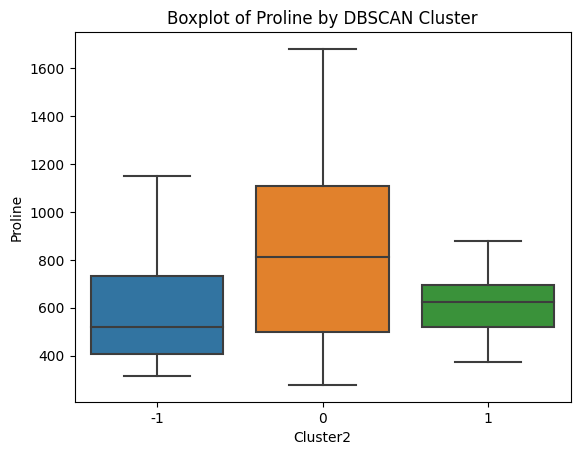

In [ ]:
sns.boxplot(x='Cluster2', y='Proline', data=df)
plt.title('Boxplot of Proline by DBSCAN Cluster')
plt.show()

DBSCAN nám vygeneroval hodnoty v -1, protože to jsou odlehlé hodnoty, to znamená, že nemají dostatek bodů okolo sebe. Na první pohled oproti k-means vidíme, že většina grafů v DBSCAN má mnohem větší rozmezí než k-means.

## Shrnutí:
Tento dataset se zabýval vínem, dozvěděli jsme se z něho informace o vínech. Co je OD280, flavanoidy a tak dále... Dále jsme se dozvěděli kolik má dataset prvků a jak jsou si podobné. Poté jsme si dataset rozdělili pomocí elbow metody a zjistili jsme, že pro porovnání clusterů je nejlepší rozdělit si je na tři části. Vygenerovali jsme boxploty a z nich se snažili zjistit data pomocí k-means a poté DBSCAN. K-means jsme si důkladně popsali a u DBSCAN jsme si napsali hlavní rozdíly oproti k-means.